In [1]:
using Laplacians

In [2]:
include("../../../src/isotonicIPM.jl")
include("../../../src/samplingSolver.jl")

computeCN (generic function with 1 method)

In [79]:
n = 10000;
a = wtedChimera(n,4);
b = zeros(Float64,n);
b[1] = 1;
b[n] = -1;
v = cg(lap(a),b,verbose=true); # use any other solver
v = v / (v[1] - v[n])

p = sortperm(v);
ap = a[p,p];
# vp = v[p]
vp = v[p] + rand(n) / sqrt(n);
at = triu(ap);

CG stopped after: 370 iterations with relative error 9.777337108176852e-7.


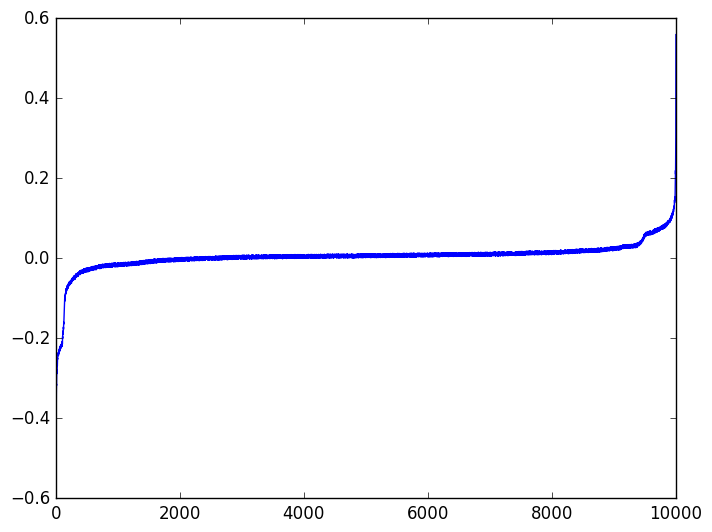

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x320307050>

In [80]:
using PyPlot
plot(1:n, vp)

In [81]:
bt = -dirEdgeVertexMat(at);

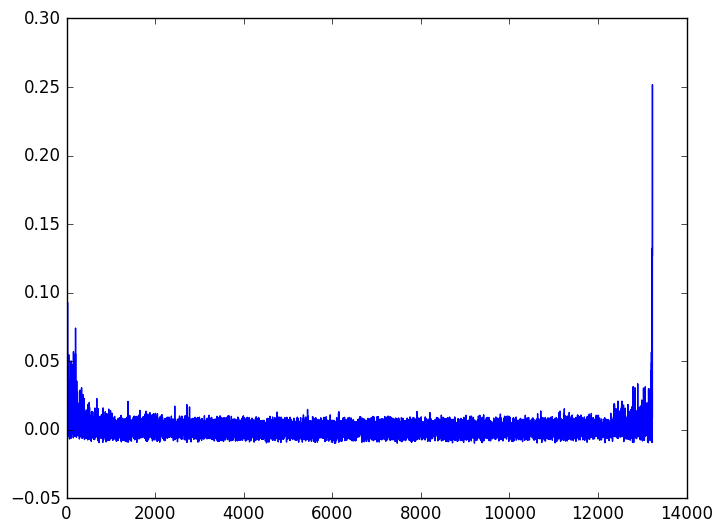

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x3282da4d0>

In [82]:
plot(1:nnz(at), bt * vp)

In [54]:
@time (x,acc,itercount) = isotonicIPMrelEps(at,vp,0.01);

So far 1 steps were made
So far 31 steps were made
So far 61 steps were made
So far 91 steps were made
So far 121 steps were made
  9.851327 seconds (30.59 M allocations: 6.061 GB, 10.69% gc time)


In [55]:
acc, itercount

(0.0075948930167516245,140)

In [51]:
tic()
(x,acc,itercount) = isotonicIPMrelEps(at,vp,0.01,
    (H -> samplingSolver(adj(H)[1], adj(H)[2], eps=0.5, sampConst=0.3, beta=1e3, tol=1e-1,maxits=1000,verbose=false)));
t = toc()

So far 1 steps were made
rho = 101.79865410435661
Initial number of edges = 46462
Average number of multiedges = 43.89856638245817
Maximum number of multiedges = 101.79865410435661
Time to build the tree and compute the stretch: elapsed time: 0.08985132 seconds

The total size of the linked list data structure should be at most 3257622
The actual size is 12100

nnz in U matrix: 37376
rho = 101.79865410435661
Initial number of edges = 46462
Average number of multiedges = 43.898402817621125
Maximum number of multiedges = 101.79865410435661
Time to build the tree and compute the stretch: elapsed time: 0.085108598 seconds

The total size of the linked list data structure should be at most 3257615
The actual size is 12100

nnz in U matrix: 38221
rho = 101.79865410435661
Initial number of edges = 46462
Average number of multiedges = 43.9026734667957
Maximum number of multiedges = 101.79865410435661
Time to build the tree and compute the stretch: elapsed time: 0.097890428 seconds

The total s

72.280733858

In [52]:
t

72.280733858

In [29]:
acc

0.002816264058464491

In [30]:
itercount

171